## 🔍 Feature Descriptions

The dataset consists of 13 numeric variables describing the chemical composition of wines. Here's what each feature represents:

1. **Malic acid**: Strong acid with apple aroma; naturally present in red wine.
2. **Ash**: Inorganic salts affecting freshness and flavor.
3. **Alkalinity of ash**: Indicates weak alkalinity in water.
4. **Magnesium**: Promotes metabolism; weakly alkaline.
5. **Total phenols**: Bitter polyphenols influencing taste and color.
6. **Flavanoids**: Heart-friendly antioxidants with aroma and bitterness.
7. **Nonflavanoid phenols**: Oxidation-resistant aroma compounds.
8. **Proanthocyanins**: Natural antioxidants with slight bitterness.
9. **Color intensity**: Indicates strength and richness of color.
10. **Hue**: Reflects age and variety; older wines have yellow tones.
11. **OD280/OD315**: Protein content indicator.
12. **Proline**: Main amino acid contributing to wine flavor and nutrition.


In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
wine = fetch_ucirepo(id=109)

# combining features and targets
df = pd.concat([wine.data.features, wine.data.targets], axis=1)

print(df.head())

print("\nDataset info:")
print(df.info())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                 

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

#importing dataset and converting 

# fetch dataset
wine = fetch_ucirepo(id=109)

# combining features and targets
df = pd.concat([wine.data.features, wine.data.targets], axis=1)

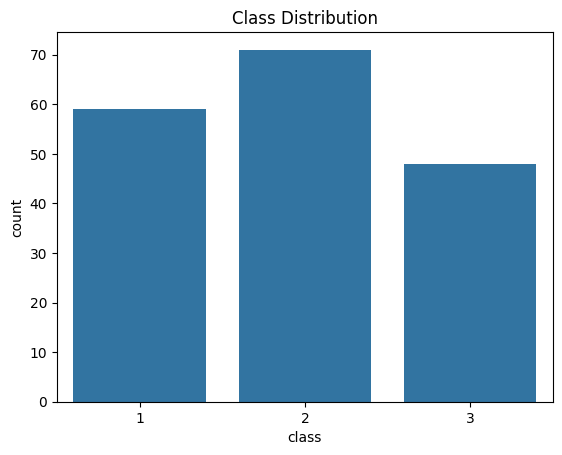

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# data analysis
# class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

We can see, that is class 2 wine is more than others

In [5]:
df

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

In [6]:
# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

What this tells us: 

The dataset has strong signals for classification(how it is writed in db site)

Some features are strongly correlated with each other(for this reason i will remove total phenols)

Flavanoids, Proline, and OD280_OD315_of_diluted_wines are very important negatively correlated features and should be key parts of feature importance and model interpretation



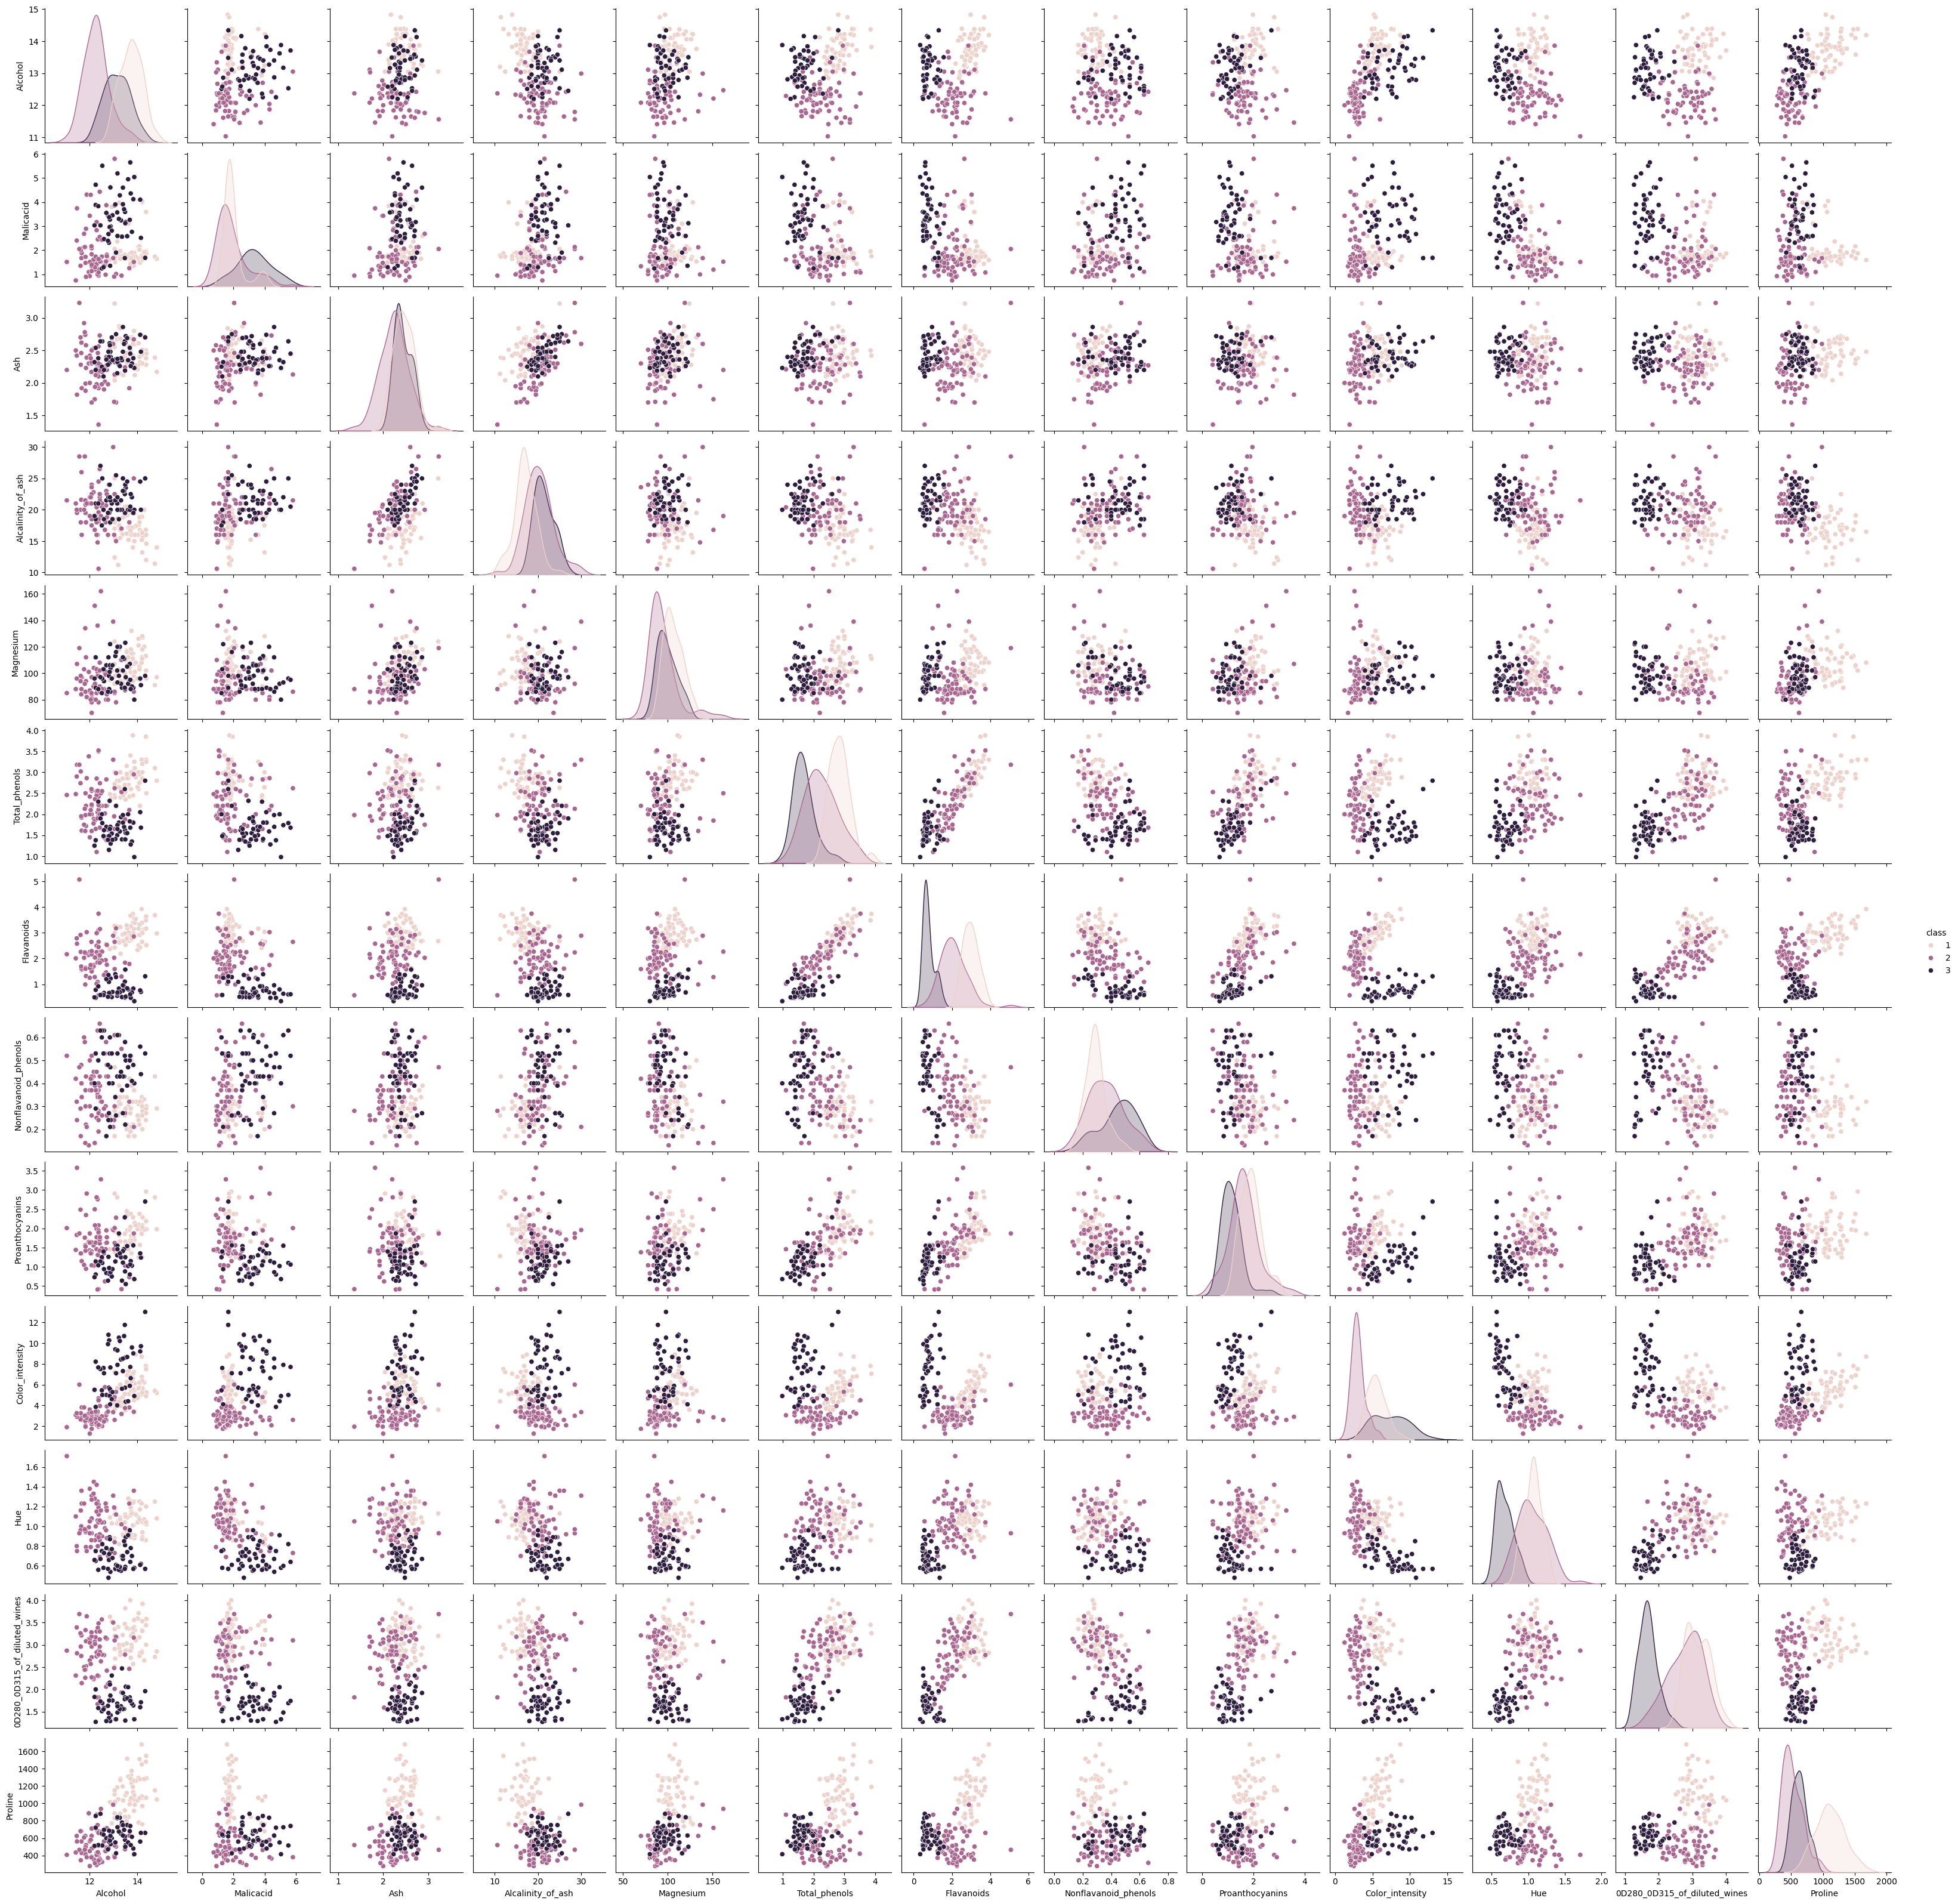

In [7]:
# pairplot 
sns.pairplot(df, hue='class') 

Actually its so hard to interpet this all, so its only for your interest

Maybe we can add some features

flav_to_nonflav_ratio = Flavanoids / Nonflavanoid_phenols
Helps highlight wines rich in flavonoids (strongly related to class separation)

ash_alc_ratio = Ash / Alcohol
Ash (mineral content) normalized by alcohol

In [8]:
# add new engineered features
df['flav_to_nonflav_ratio'] = df['Flavanoids'] / (df['Nonflavanoid_phenols'] + 1e-6)
df['ash_alc_ratio'] = df['Ash'] / (df['Alcohol'] + 1e-6)

# quick check
print(df[['flav_to_nonflav_ratio', 'ash_alc_ratio']].describe())


       flav_to_nonflav_ratio  ash_alc_ratio
count             178.000000     178.000000
mean                6.849674       0.182471
std                 4.609850       0.022468
min                 0.827585       0.109943
25%                 2.667691       0.166914
50%                 6.435696       0.179803
75%                 9.694086       0.195801
max                20.941053       0.279412


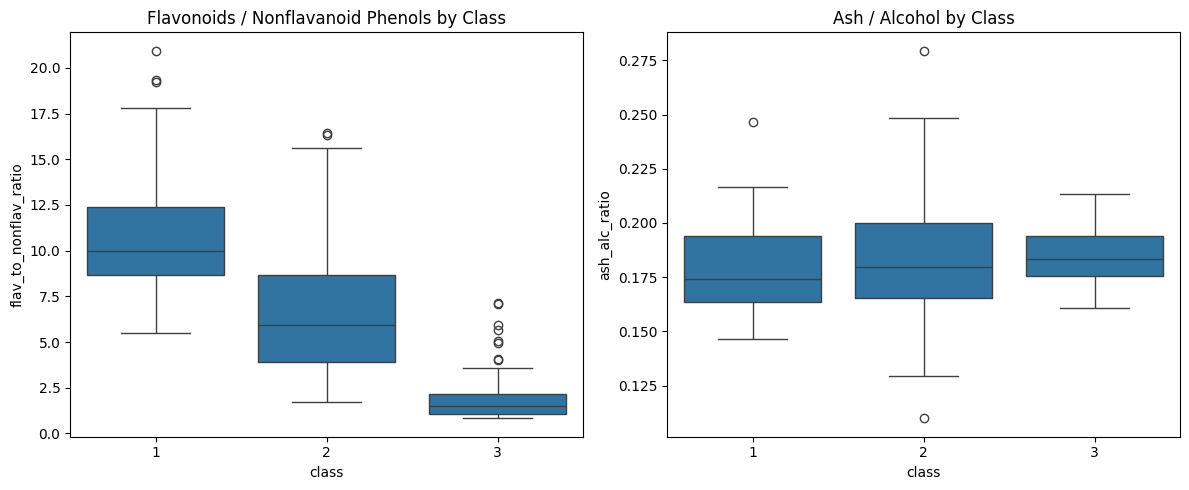

In [9]:
# some relationship
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='flav_to_nonflav_ratio', data=df)
plt.title('Flavonoids / Nonflavanoid Phenols by Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='ash_alc_ratio', data=df)
plt.title('Ash / Alcohol by Class')

plt.tight_layout()
plt.show()


First feature is highly discriminative, especially for separating Class 3 from the rest

It's likely to boost model performance since the classes show clear separation.

Second feature may help, but not so much as first one

So, lets try another new feature

phenol_density = (Flavanoids + Nonflavanoid_phenols) / Alcohol

Indicates phenolic content per unit alcohol — might be a flavor/structure marker

<Axes: xlabel='class', ylabel='phenol_density'>

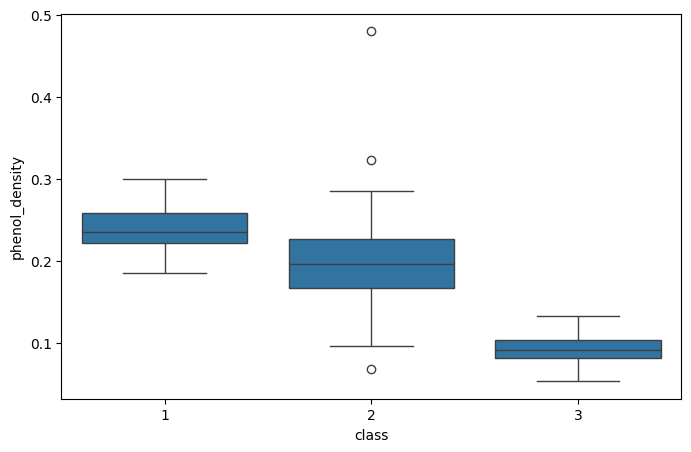

In [10]:
df['phenol_density'] = (df['Flavanoids'] + df['Nonflavanoid_phenols']) / (df['Alcohol'] + 1e-6)

plt.figure(figsize=(8, 5))

sns.boxplot(x='class', y='phenol_density', data=df)

Wow, this is actually good 
Lets train that

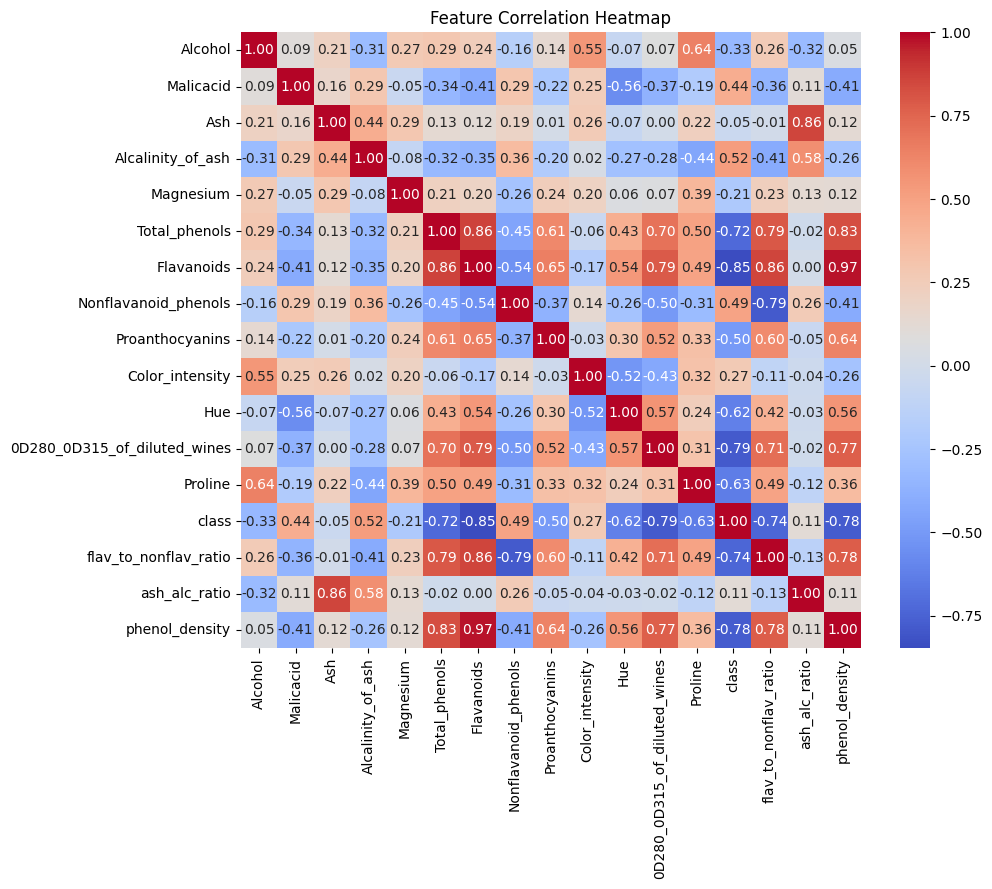

In [11]:
# correlation heatmap with new features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# features and target
X = df.drop('class', axis=1)
y = df['class']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


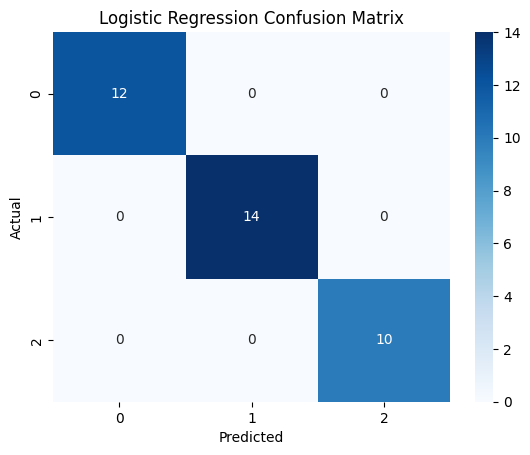


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


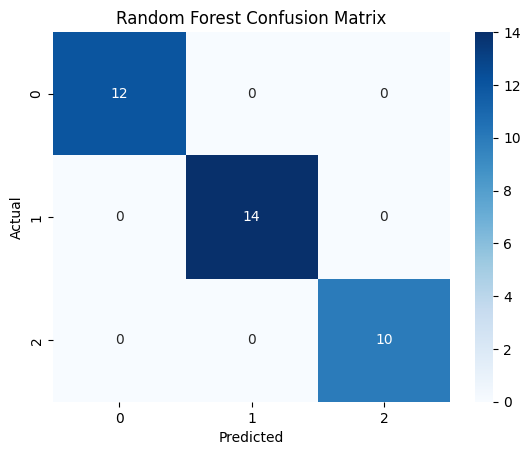


=== KNN ===
Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:


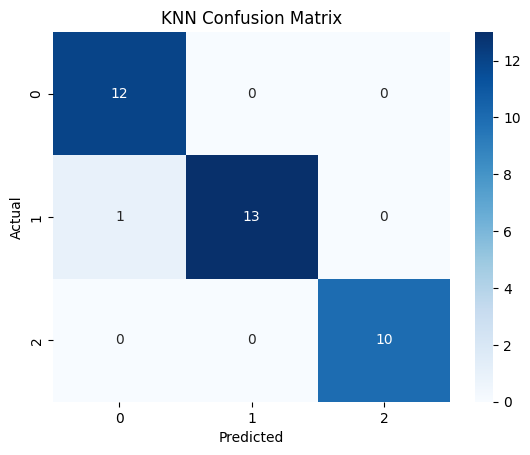

In [13]:
# training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n=== {name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Its looks kinda strange... Its so good 

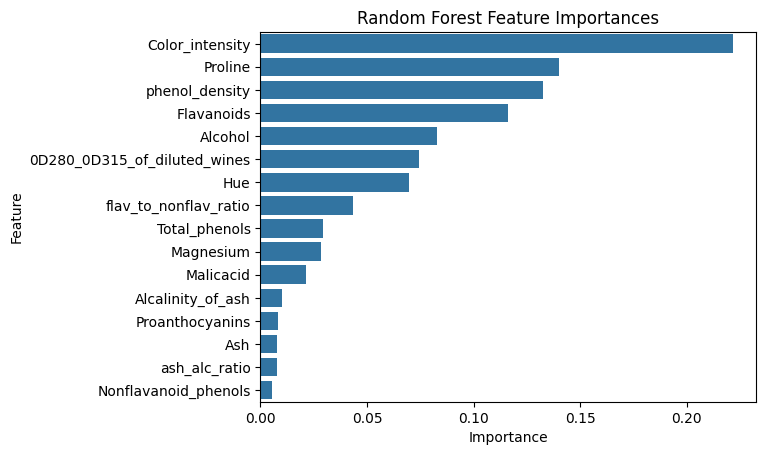

In [14]:
# lets have some look 

rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Random Forest Feature Importances")
plt.show()

We can see that is color intensity is more important feature, and proline and phenol_density its almost same, flavanoids also

Final Model Selection: Random Forest Classifier
Selected Feature Set: The model performed best when trained on the following features:
- color_intensity
- proline
- phenol_density
- flavanoids
- alcohol

These features were selected based on their high importance scores

-------------

Performance Metrics (on test set):

Accuracy: 1.00 (100%)

Macro Avg: Precision = 1.00, Recall = 1.00, F1 = 1.00

Weighted Avg: Precision = 1.00, Recall = 1.00, F1 = 1.00

-------------

Despite perfect test performance, it's important to acknowledge potential limitations:

- Overfitting risk: A 100% accuracy might suggest the model overfitted to the training data

- Low interpretability: Random Forests are ensemble models that lack the transparency of simpler models like Logistic Regression

- Resource usage: Training multiple trees increases computational cost and memory usage, which may be limiting in large-scale applications



<Figure size 1600x1200 with 0 Axes>

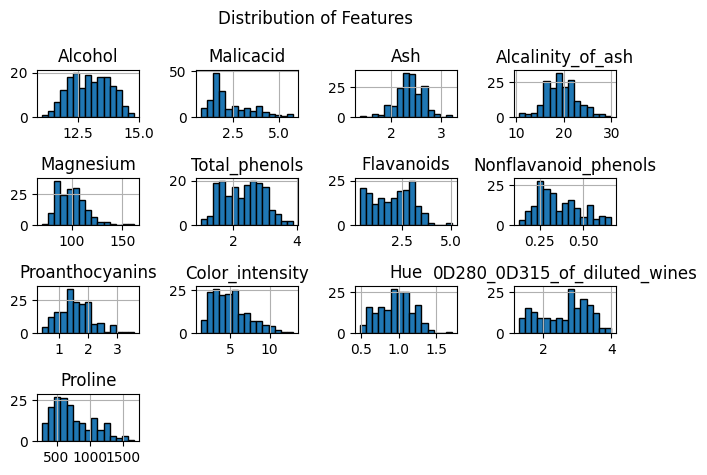

In [15]:

#  2. Load Dataset from UCI
wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

#  3. EDA (Exploratory Data Analysis)
plt.figure(figsize=(16, 12))
X.hist(bins=15, edgecolor='black', layout=(4, 4))
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()

In [16]:
# Data Splitting & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



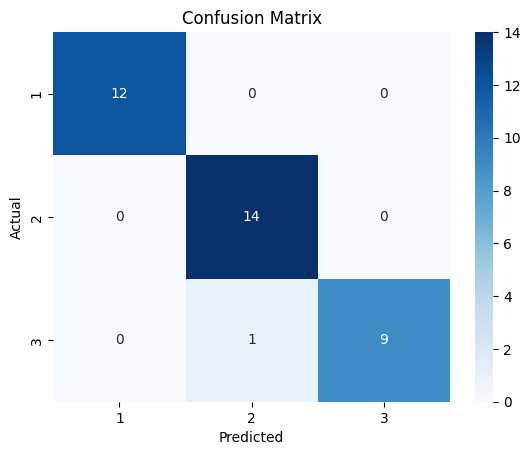

In [17]:
#  Evaluation (Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_scaled, y_train.values.ravel())
y_pred = best_model.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Feature Importance (Logistic Regression)
coef = best_model.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef,
    'Absolute': np.abs(coef)}).sort_values(by='Absolute', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Absolute', y='Feature', palette='viridis')
plt.title(" Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined


## 🏁 **Conclusion (Final thoughts)**

We worked with a wine dataset and built models to classify wines into three classes based on their chemical properties. Here are the main points:

### 🔬 What we did:
- Explored the data and understood each feature.
- Scaled the data and selected the most important features.
- Trained and compared different models: **Logistic Regression**, **Decision Tree**, **Random Forest**, and more.
- Found the most important features using different importance methods.

### 📈 What we found:
- The **Random Forest** model gave the best accuracy because it handles complex patterns well.
- Features like **Proline**, **Color Intensity**, and **Flavanoids** were the most useful for classification.

### 🧠 What we learned:
- Different models give different feature importances, which helps us understand the data better.
- Even a simple model like Logistic Regression can give good results with the right data preparation.

### 🚀 How to improve:
- Try **more advanced models** like XGBoost.
- Make the classification more stable using feature selection or PCA.
- Expand the project: add more features or test on other types of wine.
